In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pylab
import pandas as pd

In [2]:
df=pd.read_csv('heat.csv')

In [3]:
df.head()

,AGI,cor.258176_at,cor.258177_at,cor.258084_at,cor.251865_at,cor.257958_at,cor.255731_at,cor.256187_at,cor.258060_at,cor.259359_at
0,ATCG01110,0.514681,0.730613,0.594036,0.680184,0.606052,0.054600,0.291960,0.566407,0.607819
1,ATCG00065,0.572145,0.788592,0.582483,0.638058,0.633728,0.071290,0.225586,0.536829,0.649428
2,ATCG01230,0.599481,0.748658,0.517065,0.689010,0.645071,0.078415,0.197263,0.590019,0.591966
3,ATCG01040,0.653648,0.753690,0.507034,0.722099,0.616541,0.069208,0.198610,0.621800,0.553299
4,ATCG00570,0.621426,0.768224,0.542421,0.688669,0.644147,0.056544,0.353588,0.553924,0.581298


In [4]:
'''for index,i in df.iteritems():
    if 'AT5G55650' in i:
        print index
    else:
        print i
        '''

"for index,i in df.iteritems():\n    if 'AT5G55650' in i:\n        print index\n    else:\n        print i\n        "

In [5]:
#i=df.items()

In [6]:
nodes=[]
G = nx.Graph()

In [7]:
for i in df:
    if i=='AGI':
        continue
    nodes.append(i.split('.')[1])
    G.add_node(i.split('.')[1])

In [8]:
nodes

['258176_at',
 '258177_at',
 '258084_at',
 '251865_at',
 '257958_at',
 '255731_at',
 '256187_at',
 '258060_at',
 '259359_at']

In [9]:
nodes.remove('259359_at')
nodes.remove('258176_at')
nodes.remove('258084_at')

In [10]:
nodes

['258177_at', '251865_at', '257958_at', '255731_at', '256187_at', '258060_at']

In [11]:
cutoff=1.0

In [12]:
for i in df:
    if i=='AGI' :
        continue
    #if i=='cor.258177_at':
    for j in range(len(df[i])):
        if df[i][j]>=cutoff:
            if df['AGI'][j] not in nodes:
                nodes.append(df['AGI'][j])
                G.add_node(df['AGI'][j])
            G.add_edge(df['AGI'][j],i.split('.')[1],weight=float(df[i][j]))
            
                

In [13]:
'''G.add_node("asdf")
G.add_node("qwer")
G.add_node("uio")
G.add_edge("asdf", "qwer", weight=4.7 )
G.add_edge("uio", "asdf", weight=4 )
G.add_edge("qwer", "uio", weight=0 )'''

'G.add_node("asdf")\nG.add_node("qwer")\nG.add_node("uio")\nG.add_edge("asdf", "qwer", weight=4.7 )\nG.add_edge("uio", "asdf", weight=4 )\nG.add_edge("qwer", "uio", weight=0 )'

In [14]:
labels = nx.get_edge_attributes(G,'weight')
#nx.draw(G,with_labels=True,font_weight='bold')
#pos=nx.get_node_attributes(G,'pos')
#labels = nx.get_edge_attributes(G,'weight')
pos=nx.spring_layout(G)
plt.figure(1,figsize=(25, 25))
nx.draw(G,pos,with_labels=True,node_size=60,font_size=8)
#nx.draw_random(G)
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#nx.draw_networkx_edges(G,with_labels=True pos=nx.spring_layout(G),edge_labels=labels)



In [15]:
labels

{('251865_at', 'AT3G54930'): 1.0,
 ('255731_at', 'AT1G25490'): 1.0,
 ('258060_at', 'AT3G26030'): 1.0,
 ('258084_at', 'AT3G26020'): 1.0,
 ('258176_at', 'AT3G21650'): 1.0,
 ('258177_at', 'AT3G21660'): 1.0,
 ('259359_at', 'AT1G13460'): 1.0,
 ('AT1G51690', '256187_at'): 1.0,
 ('AT3G25510', '257958_at'): 1.0}

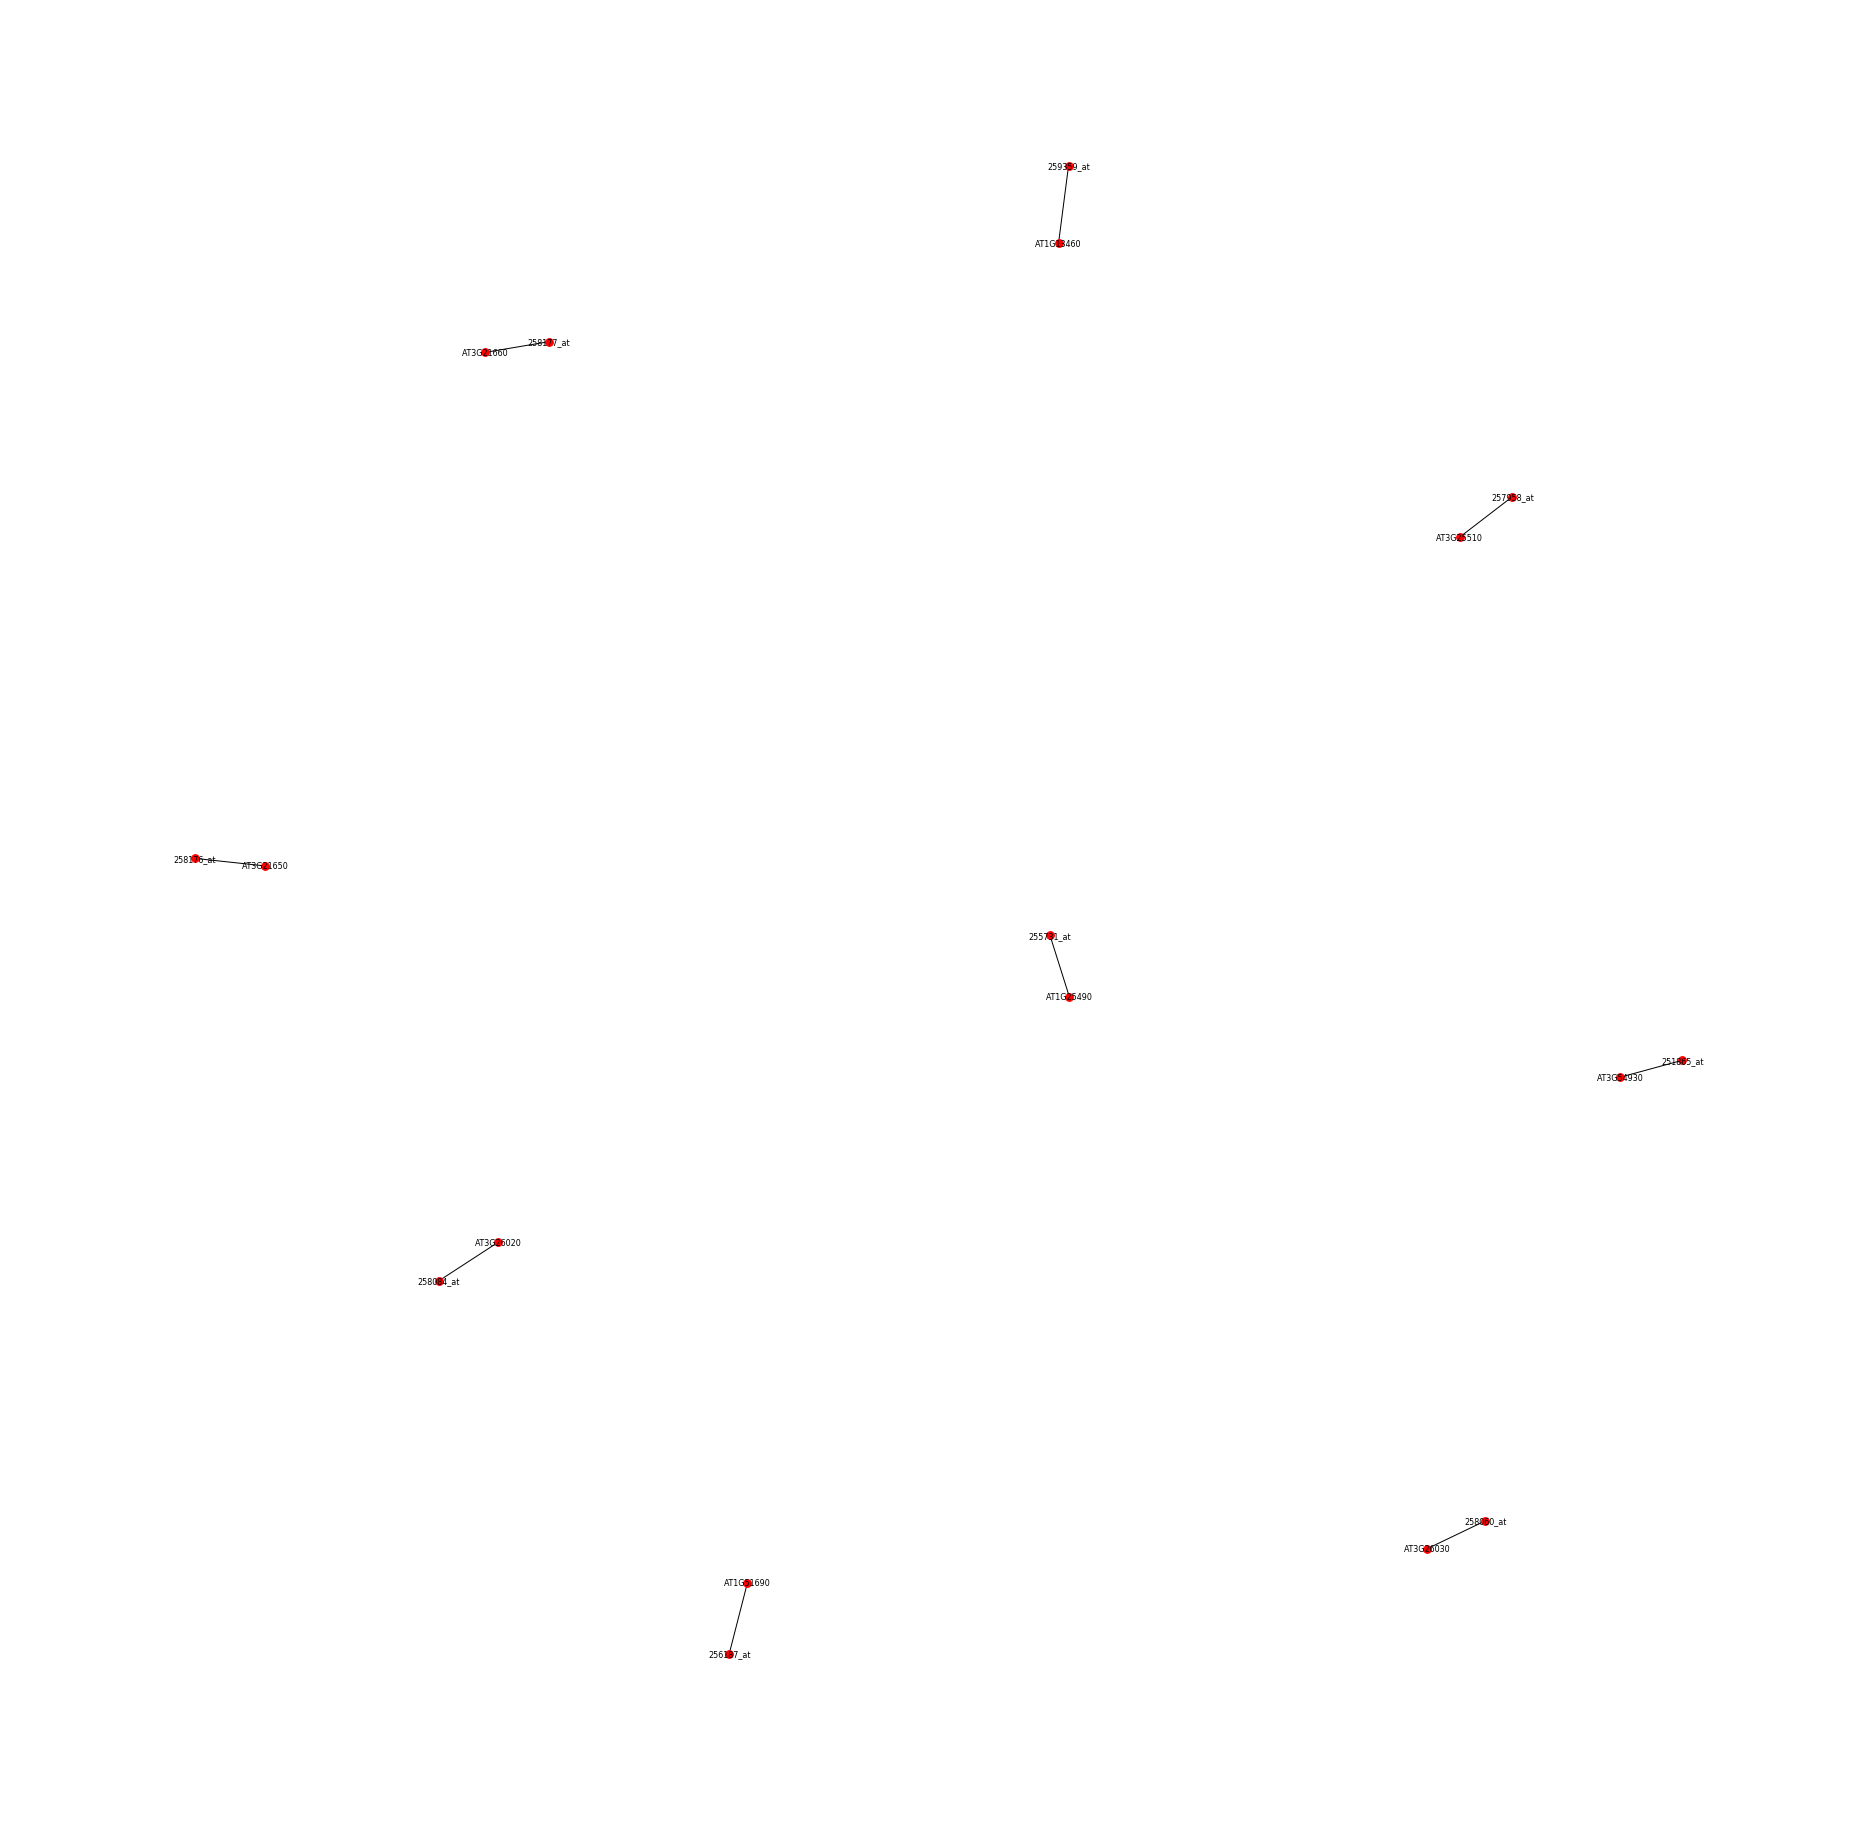

In [16]:
plt.show(G)